## Experiment tracking

(Example)

| ID | Data | Pre | Seperation Date | Algorithm | RMSLE Train | RMSLE Test | Code | Comments |
|---|---|---|---|---|---|---|---|---|
| 0 | gdsc2_public.csv | Standard | 01.01.2018 | Median | 1.62 | 2.10 | [Link](http://de-mucingode1/gitlab/dkuehlwein/global_data_science_challenge_2_public/tags/Baselines) | Baseline |
| 1 | gdsc2_public.csv | One-Hot-Encoding of 'work_type', 'work_priority' | 01.01.2018 | KNNRegressor (Default) | 1.99 | 1.49 | [Link](http://de-mucingode1/gitlab/dkuehlwein/global_data_science_challenge_2_public/tags/Baselines) | Performs worse than baseline on training. Model is not complex enough, need to check train/test split | 

In [151]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 30)

In [152]:
df = pd.read_csv('Taxi-time Prediction Data/0. Airport data/Airport_Data.csv')

In [153]:
not_used = [x.lower() for x in ['mode_s'
,'Status'
,'sqt'
,'Stand_last_change'
,'Stand_scheduled'
,'aldt_received'
,'Stand_prepared'
,'Stand_auto_start'
,'Stand_active'
,'Stand_docking'
,'aibt_received'
,'vdgs_in'
,'plb_on'
,'pca_on'
,'gpu_on'
,'towbar_on'
,'pca_off'
,'gpu_off'
,'acars_out'
,'vdgs_out'
,'Stand_free'
,'roll'
,'speed'
,'last_distance_to_gate'
,'last_in_sector']]
df = df[[x for x in df.columns if x not in not_used]]
df = df[df['aibt'] != 'aibt'] # drop 159 weird rows
df = df.dropna(subset=['aldt','aibt']) # drop NA for arrival and block time 

In [154]:
df.describe()

,partition,carrier,flight,acType,acReg,ship,sto,runway,stand,aldt,eibt,cibt,aibt,chocks_on,plb_off,eobt,aobt,atot
count,137992,137992,137992,137990,137990,137990,137992,134509,137992,137992,137992,134494,137992,109782,0.0,0.0,0.0,0.0
unique,1,5,3608,36,1207,1183,79813,10,160,100001,90630,88535,90525,77737,0.0,0.0,0.0,0.0
top,AP,CAR1,2410,MD88,N998DL,913,8/20/2018 1:45,RUNWAY09,STAND13,1/5/2019 0:05,9/26/2018 1:50,12/13/2018 1:17,11/30/2018 19:09,12/13/2018 1:18,NaN,NaN,NaN,NaN
freq,137992,112280,152,36965,439,584,15,32830,1286,4,15,8,8,8,NaN,NaN,NaN,NaN


In [155]:
df.head()

,partition,carrier,flight,acType,acReg,ship,sto,runway,stand,aldt,eibt,cibt,aibt,chocks_on,plb_off,eobt,aobt,atot
4,AP,CAR1,2519,B737/9-WL,N845DN,3845,7/30/2018 4:45,RUNWAY02,STAND04,7/30/2018 4:25,7/30/2018 4:33,7/30/2018 4:33,7/30/2018 4:29,7/30/2018 4:30,NaN,NaN,NaN,NaN
7,AP,CAR1,1757,B757/2-WL,N555NW,5655,7/30/2018 8:53,RUNWAY02,STAND07,7/30/2018 8:14,7/30/2018 8:19,7/30/2018 8:18,7/30/2018 8:18,7/30/2018 8:19,NaN,NaN,NaN,NaN
8,AP,CAR1,1636,A321/2,N311DN,3011,7/30/2018 8:49,RUNWAY01,STAND08,7/30/2018 8:26,7/30/2018 8:31,7/30/2018 8:32,7/30/2018 8:29,7/30/2018 8:30,NaN,NaN,NaN,NaN
9,AP,CAR1,2048,B737/9-WL,N813DN,3813,7/30/2018 8:56,RUNWAY02,STAND09,7/30/2018 8:42,7/30/2018 8:47,7/30/2018 8:45,7/30/2018 8:46,NaN,NaN,NaN,NaN,NaN
11,AP,CAR1,2510,A321/2,N348DN,3048,7/30/2018 9:14,RUNWAY02,STAND11,7/30/2018 8:52,7/30/2018 8:57,7/30/2018 8:57,7/30/2018 8:57,7/30/2018 8:58,NaN,NaN,NaN,NaN


In [156]:
def split_date_time(dt):
    date, time = dt.split()
    month, day, year = date.split('/')
    hour, minute = time.split(':')
    return pd.Timestamp(year=int(year), month=int(month), day=int(day), hour=int(hour), minute=int(minute))
df['landing_time'] = df.aldt.apply(split_date_time)
df['block_time'] = df.aibt.apply(split_date_time)
#df['calculated_time'] = df.cibt.apply(split_date_time)
#df['estimated_time'] = df.eibt.apply(split_date_time)
df = df.drop(['aldt','aibt'], axis=1) # ,'cibt','eibt'
df['t'] = df['block_time'] - df['landing_time']
df['t_minutes'] = df['t'].apply(lambda x: x.seconds/60)

In [157]:
df = df[df.t_minutes < 200]

In [158]:
df['date'] = df.landing_time.dt.date

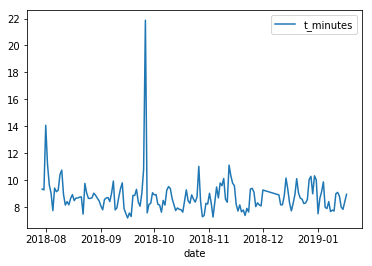

In [159]:
df['date'] = df.landing_time.dt.date
df.groupby('date').mean().plot()

In [116]:
df.t_minutes - df.t_minutes.mean()

In [160]:
((df.t_minutes - df.t_minutes.mean()) ** 2).mean()

22.174869331258225

In [162]:
df.index = df.landing_time

In [166]:
df.sort_index(inplace=True)

In [170]:
df.rolling('2m').mean()

ValueError: <2 * MonthEnds> is a non-fixed frequency